<a href="https://colab.research.google.com/github/IEEESBITBA/Curso-Python/blob/master/Clase_4_Solucionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 4 - Solucionario**

En este documento se encuentra todos los mini-task de la clase 4 y ejercicios integradores resueltos


### **Mini task 1**

Gráficar en el intervalo de **[-5, 5]** una [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana) definida como

$$ f(x) = e^{-x^2/2} $$

Usar la funcion [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) de numpy 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-5,5,10000)
gaussiana = 5*np.exp(-x**2/2) # expresion vectorizada, tenemos los valores de sin(x) en cada instante

plt.plot(x, gaussiana)
plt.show()

#### **Mini task 2** - versión A facil

 Se pide realizar un grafico del valor del  **Bitcoin** de los ultimos 10 años, marcar con un punto el valor maximo del gráfico, calcular cuando sucedió.

 **Nota:**  
 - Usen la función [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Un **.csv** es prácticamente identico a un **.xlsx**.
 - Los valores a graficar estan la columna "Open" (usando **to_dict("list"**) podrían resolver el problema).

In [0]:
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/BTC.csv         #WARNING No tiene 10 Años

#Datos extraidos desde https://es.finance.yahoo.com/

### **Solución 1** - usando for para buscar el máximo

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = pd.read_csv("BTC.csv")
data = archivo.to_dict("list")
columnaOpen = data["Open"]

maximo_valor = -1000 # muy chico
item_maximo = -1 # cualquier valor

for i in range(len(columnaOpen)):
    if columnaOpen[i] > maximo_valor:
        maximo_valor = columnaOpen[i]
        item_maximo = i

plt.plot(columnaOpen)
plt.plot(item_maximo, maximo_valor, 'ro')
plt.show()


### **Solución 2** - usando max para buscar el máximo

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = pd.read_csv("BTC.csv")
data = archivo.to_dict("list")
columnaOpen = data["Open"]

maximoValor = max(columnaOpen)
item_maximo = -1 # cualquier valor
for i in range(len(columnaOpen)):
    if columnaOpen[i] == maximoValor:
        item_maximo = i

plt.plot(columnaOpen)
plt.plot(item_maximo, maximoValor, 'ro')
plt.show()

### **Solución 3** usando la funcion [index](https://www.tutorialspoint.com/python-program-to-find-maximum-and-minimum-element-s-position-in-a-list)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = pd.read_csv("BTC.csv")
data = archivo.to_dict("list")
columnaOpen = data["Open"]

maximoValor = max(columnaOpen)
itemMaximo = columnaOpen.index(maximoValor) # funcion index aplicada a columnaOpen

plt.plot(columnaOpen)
plt.plot(itemMaximo, maximoValor, 'ro')
plt.show()

 #### **Mini task 2** - versión B dificil
 
 Se pide realizar un grafico del valor de las acciones diarias de las compañias **Amazon** y **Google** de los ultimos 10 años. Encontrar los puntos donde se cruzan los dos gráficos y marcarlos con un punto. Usar dos tipos de linea distintos. 

  **Nota:**  
 - Usen la función [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) Un **.csv** es prácticamente identico a un **.xlsx**.
 - Los valores a graficar estan la columna open (usando **to_dict("list"**) podrían resolver el problema).

In [3]:
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/GOOGLE.csv
! wget  https://raw.githubusercontent.com/LedesmaFran/python/master/AMZN.csv

#Datos extraidos desde https://es.finance.yahoo.com/

--2019-11-09 13:29:42--  https://raw.githubusercontent.com/LedesmaFran/python/master/GOOGLE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188655 (184K) [text/plain]
Saving to: ‘GOOGLE.csv’

GOOGLE.csv          100%[===================>] 184.23K  --.-KB/s    in 0.04s   

2019-11-09 13:29:43 (4.88 MB/s) - ‘GOOGLE.csv’ saved [188655/188655]

--2019-11-09 13:29:44--  https://raw.githubusercontent.com/LedesmaFran/python/master/AMZN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189005 (185K) [text/plain]
Saving to: ‘AMZN.csv’

AMZN.cs

#### **Solución 1** - con **Epsilon**

Sugerencia: repasar en la [clase 2](bit.ly/PyClase2) la tercer celda de código de la sección de floats. Alli se explica que los floats no pueden ser comparados con el operador == debido a que tienen un error asociado, y que entonces para revisar si dos variables de tipo float son iguales se debe revisar si son parecidos calculando la distancia entre los dos numeros (*abs(x_1-x_2)*) y fijandose si es menor a un número pequeño, que se suele llamar **epsilon**.

El establecimiento del valor de dicho número es por [prueba y error](https://es.wikipedia.org/wiki/Ensayo_y_error).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

def floatsIguales(n1, n2): # revisa si dos numeros n1 y n2 son iguales
    epsilon = 1 #esto es equivalente a escribir 10**-5
    return abs(n1-n2) < epsilon

google = pd.read_csv("GOOGLE.csv")
amzn = pd.read_csv("AMZN.csv")

dataGoogle = google.to_dict("list")["Open"] # accedemos a la comuna Open
dataAmzn = amzn.to_dict("list")["Open"]

puntosDeIgualdad = []
valoresDeIgualdad = []

for i in range(len(dataGoogle)):
    if floatsIguales(dataGoogle[i], dataAmzn[i]):
        puntosDeIgualdad.append(i)
        valoresDeIgualdad.append(dataGoogle[i]) # podria ser dataAmzn


plt.plot(dataGoogle, label="Google")
plt.plot(dataAmzn, label="Amzn")
plt.plot(puntosDeIgualdad, valoresDeIgualdad, 'ro')

plt.legend()
plt.show()

### **Solución 2** - con inferencias

En esta solución se infinere que hubo una interseccion si suecede que en un instante i google supera a Amazon, y al siguiente (el i+1) ocurre lo contrario (Amazon supera google). También si ocurren los sucesos en el orden contrario se entiende que existió una intersección. En esta solució no se necesita buscar empiricamente el valor de **epsilon**.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

google = pd.read_csv("GOOGLE.csv")
amzn = pd.read_csv("AMZN.csv")

dataGoogle = google.to_dict("list")["Open"] # accedemos a la comuna Open
dataAmzn = amzn.to_dict("list")["Open"]

puntosDeIgualdad = []
valoresDeIgualdad = []

for i in range(len(dataGoogle)-1):
    if dataGoogle[i] > dataAmzn[i] and dataGoogle[i+1] < dataAmzn[i+1]:
        puntosDeIgualdad.append(i)
        valoresDeIgualdad.append(dataGoogle[i]) # podria ser dataAmzn
    elif dataGoogle[i] < dataAmzn[i] and dataGoogle[i+1] > dataAmzn[i+1]:
        puntosDeIgualdad.append(i)
        valoresDeIgualdad.append(dataGoogle[i]) # podria ser dataAmzn


plt.plot(dataGoogle, label="Google")
plt.plot(dataAmzn, label="Amzn")
plt.plot(puntosDeIgualdad, valoresDeIgualdad, 'ro')

plt.legend()
plt.show()

### **Mini task 3**
Hacer una pizza con 4 sabores distintos

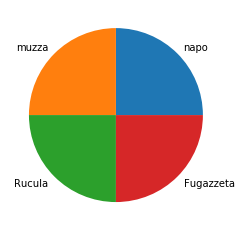

In [0]:
sabores = ["napo","muzza","Rucula","Fugazzeta"]
porciones =[2,2,2,2]

plt.pie(porciones,labels=sabores)
plt.show()

### **Mini task 4**

Leer el archivo **notas.xlsx** que tiene en el campo **Notas** los puntajes de alumnos en un examen (van de 0 a 10) y armar un histograma con los datos, guadrarlo en un archivo **Notas.png**

In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/notas.xlsx"

In [0]:
import pandas as pd

archivo = pd.read_excel("notas.xlsx") 

data = archivo.to_dict("list")

plt.hist(data["notas"])
plt.show()

### **Mini task final** - version A facil

Se tiene en un archivo **electrocardiograma.xlsx** la información del resultado de un electrocardiograma en dos columnas, una tiene los tiempos de las mediciones (**tiempo**), y la segunda los valores de la señal (**señal**). Calcular los picos del gráfico y marcarlos.

Sugerencia: [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [5]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx"

--2019-11-09 13:43:56--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42529 (42K) [application/octet-stream]
Saving to: ‘electrocardiograma.xlsx’

electrocardiograma. 100%[===================>]  41.53K  --.-KB/s    in 0.02s   

2019-11-09 13:43:57 (1.64 MB/s) - ‘electrocardiograma.xlsx’ saved [42529/42529]



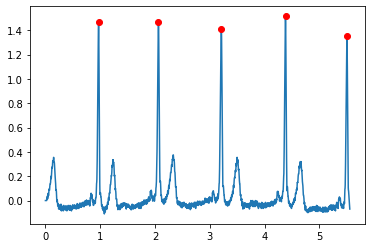

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

from scipy.signal import find_peaks

archivo = pd.read_excel("electrocardiograma.xlsx") 

data = archivo.to_dict("list")

valores = data["señal"]
t = data["tiempo"]

peaks, _ = find_peaks(valores, height=1)  # height=1 es la altura minima para que un salto sea considerado pico

plt.plot(tiempos, valores)

for peak in peaks:  # graficamos con puntos rojos los picos
    plt.plot(tiempos[peak], valores[peak], "ro")

plt.show()


### **Mini task final** - version B dificil

Se tiene en un archivo **electrocardiograma.xlsx** la información del resultado de un electrocardiograma en dos columnas, una tiene los tiempos de las mediciones (**tiempo**), y la segunda los valores de la señal (**valor**). Calcular las [frecuencia cardiaca](https://es.wikipedia.org/wiki/Frecuencia_card%C3%ADaca) del paciente medida en latidos por minuto.

Sugerencia: [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)


In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_4_datos/electrocardiograma.xlsx"

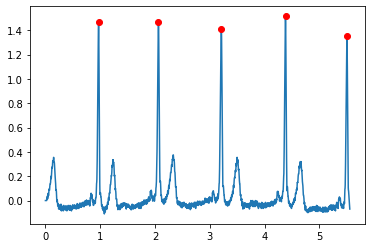

El paciente tiene 52.97 latidos por minuto


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

from scipy.signal import find_peaks

archivo = pd.read_excel("electrocardiograma.xlsx") 

data = archivo.to_dict("list")

valores = data["señal"]
tiempos = data["tiempo"]

peaks, _ = find_peaks(valores, height=1)

plt.plot(tiempos,valores)

distances = [] # almacenamos las distancias entre picos para hacer el promedio
last_pico = -1

for peak in peaks:  
    if last_pico != -1:
        distances.append(tiempos[peak]-tiempos[last_pico])
    plt.plot(tiempos[peak], valores[peak], "ro")
    last_pico = peak

plt.show()

periodo = sum(distances) / len(distances)

lat_ppm = (1/periodo)*60 # latidos por minuto

print("El paciente tiene %0.2f latidos por minuto" % lat_ppm) # googlear como usar esta sintaxis para mostrar el numero con dos decimales


# Ejercitación integradora $\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{\cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$


## $\pieceofcake$ Those 3 sides
Escribir una función que dibuje un triangulo equilatero, debe recibir 3 parametros: 


-   X,Y: coordenadas del centro
-   L: Largo de los lados

In [0]:
import matplotlib.pyplot as plt

def plot_triang(x, y, l):
    sin60 = 0.86602540378 #seno de 60 grados
    
    # coordenadas de la esquina izquierda, arriba, derecha
    # repito la izquierda para que se cierre el triangulo
    xcoord = [x-l/2,    0,       x+l/2,   x-l/2]
    ycoord = [0,        l*sin60, 0,       0]
    
    plt.plot(xcoord, ycoord)
    plt.show()
    
    
plot_triang(0, 0, 50)

## $\facil$ Caja y Bigote

Vamos a crear un histograma (visto a comienzo de clase) y un <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html">*Box-and-Whisker plot*</a>. 


<center>
<img src="https://matplotlib.org/_images/sphx_glr_boxplot_demo_pyplot_001.png" height=300 title="Box and Whisker plot ejemplo.">
 </center>
 
 Este tipo de gráfico es comunmente utilizado para mostrar la distribución de una población de forma muy visual.

## Código dado
```
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("NotasFinitos.csv")
print(datos)
```
## Objetivos

### Procesamiento de datos
Procesar Notas de tres parciales (convertirlas a números). Se debería obtener tres listas con notas del 0-140, una para cada uno de los tres parciales. Tengan cuidado que pandas devuelve las notas en formato `string`!

  Función para ver si un valor es `NaN`
 ```
 def isNaN(num):
    return num != num
 ```
 
 ### Graficar Histograma
 
El histograma debería tener 5 barras **por cada parcial**.
 
 **Intervalos:**
 * Notas entre 0-30
 * Notas entre 31-60
 *  Notas entre 61-90
 * Notas entre 91-120
 * Notas entre 121-140
 
 Esto se puede lograr otorgandole un valor a la propiedad  <a href="https://en.wikipedia.org/wiki/Histogram">`bins` del histograma</a>. 
 
```
plt.hist([parcial1,parcial2,parcial3], bins=intervalos_superiores ,label=nombreDeDatasets)
```

  ### Graficar Box-and-Whisker plot
 Graficar el *box-and-whisker plot*
 
 ```
 plt.boxplot([notasParcial1, notasParcial2, notasParcial3])
 ```

 
 
 **Datos y Tips**
 
 * Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)
 
 * Descartar los valores no-numéricos (Ausente y NaN)
 
 * Usar $\mathrm{int()}$ para convertir valores numericos de `string` a `int`!


In [0]:
def numeralizar(datos):
  datosNumeralizados=[]
  for i in range(len(datos)):
    dato = datos[i]
    if dato!=dato:
      continue
    elif dato=='Ausente':
      continue
    else:
        datosNumeralizados.append(int(dato))
  return datosNumeralizados


! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("NotasFinitos.csv") 

notas1 = datos['1P']
notas2 = datos['2P']
notas3 = datos['3P']

parcial1=numeralizar(notas1)
parcial2=numeralizar(notas2)
parcial3=numeralizar(notas3)


intervalos_superiores=[30,60,90,120,140]
nombreDeDatasets=['Parcial 1','Parcial 2','Parcial 3']
plt.hist([parcial1,parcial2,parcial3], bins=intervalos_superiores ,label=nombreDeDatasets)
plt.legend(loc="upper right")
plt.show()

_=plt.boxplot([parcial1,parcial2,parcial3]) 
# ax1.show()


## $\normal$ Bug Catcher y el disco de la Eutrofia 
Pasaron 10 años desde que se concretó un acuerdo para la construcción de una fabrica de queso al lado del Lago Nahuel Huapi, a dos kilometros de la ciudad natal de *Bug Catcher*. *Bug Catcher* dice que en ese tiempo el agua del lago ha visto un deterioro en su calidad y esta peticionando ante la ciudad la imposición de regulaciones más estrictas sobre los efluentes de la fabrica.

Pero primero tiene que demostrar este deterioro... *Y así,* Bug Catcher *ha venido a tí para pedirte ayuda graficando los resultados de un estudio de agua.*

$\newcommand{\zf}{{z_{\mathrm{f}}}}$

---


<center>
<img src="https://cdn.bulbagarden.net/upload/archive/3/3f/20091012043640%21Spr_RG_Bug_Catcher.png" height=200 title="I catch bugs and stop global conglomerates from getting away with enviromental crimes." ></center>


---


**El estudio**

Se efectua un estudio de <a href="https://en.wikipedia.org/wiki/Trophic_state_index#Eutrophic">turbiedad</a> de agua del tipo <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a> . El estudio consiste en hundir un disco blanco en el cuerpo de agua a estudiar y medir la profundidad $\zf$  a la cual el disco desaparece. Para el estudio se tiene que tener en cuenta la intensidad de la luz sobre el cuerpo de agua $I_0$.



**El problema**

*Bug Catcher* quiere un gráfico que muestre la turbiedad del lago Nahuel Huapi y compararlo a la de otro lago cercano <a href="https://es.wikipedia.org/wiki/Anexo:Definiciones_usuales_en_hidrolog%C3%ADa#Aguas_arriba">*río arriba*</a>. 

**Objetivo**

Graficar la intensidad de luz $I_z$ en el eje vertical a una profundidad $z$ ($z$ en el eje horizontal) para el Nahuel Huapi y el otro lago. 

**Datos**

Rige la ley de <a href="https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law">Beer-Lambert</a>:
$$\frac{I_{z}}{I_{0}}=e^{-k z}$$
donde 
* $I_z$ es la intensidad de luz a una profundidad $z$
* $I_0$ es la intensidad de luz sobre la superficie del agua, para un día soleado $I_0\approx 700\  \mathrm{W/m}^2$
* $k$ es el factor de atenuación del agua. Indica turbiedad.

Sabemos que el disco <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a>  de *Bug Catcher* desaparece bajo **56cm** de agua del Nahuel Huapi.  **Para todos los cálculos suponga que la relación** $\frac{I_\zf}{I_0}$ **vale** $10\%$ (para la profundidad a la cual desaparece el disco).

El factor de atenuación del lago *río arriba* fue medido la semana pasada y vale $k_{\mathrm{ra}}=0,009\ \mathrm{cm}^{-1}$.

**Tips:**

* Hay que despejar $k$ y calcularla para el lago Nahuel Huapi antes de graficar
* la función `log` de la libreria `math` es el logaritmo natural
* Pruebe graficar ambas curvas hasta la profundidad $\zf$ del lago río arriba
* **Tener una bolígrafo y un cuaderno abierto ayuda.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
IzIo=0.1
zfNahuel = 56
kNahuel=-np.log(IzIo)/zfNahuel

kRioArriba = 0.009
zfRioArriba = -np.log(IzIo)/kRioArriba
print('Nahuel Huapi k=',kNahuel)
print('Rio Arriba k=',kRioArriba)
z = np.arange(0,zfRioArriba,1)

I0= 700
IzNahuel = I0*np.e**(-kNahuel*z)
IzRioArriba = I0*np.e**(-kRioArriba*z)

plt.figure(figsize=(15,9))
plt.plot(z, IzNahuel, "blue",label="Nahuel Huapi")
plt.plot(z, IzRioArriba, "cyan",label="Río arriba")
plt.ylabel("Intensidad Iz [W/m^2]")
plt.xlabel("Profundidad z [cm]")

plt.title("Abajo con la fabrica")
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')

## BUG CATCHER:Algas CONTINUED
Izsuperior = 0.25
Izinferior = 0.03
zinferior= -np.log(Izsuperior)/kNahuel
zsuperior = -np.log(Izinferior)/kNahuel

zbien  = np.arange(zinferior,zsuperior,0.2)
zmal =np.arange(zsuperior,zfRioArriba,0.2) 

Izbien = I0*np.e**(-kNahuel*zbien) 
Izmal = I0*np.e**(-kNahuel*zmal)
plt.fill_between(zbien, Izbien, color="green",label="Crecimiento bueno")

plt.fill_between(zmal, Izmal,color="red",label="Crecimiento malo")
plt.legend(loc="upper right")
plt.show()

## $\dificil$ Esos Malditos Mecánicos...
Los mecánicos viven bajo la impresión que el $\text{MATLAB}$ resuelve todos los problemas. Lo que no te cuentan es que cuando llega el momento de guardar o promediar las notas, *abren un Excel*... Si solo alguien les enseñara un poco de Python...

**Intro**

Volodymyr es un profesor de la materia **Elementos Finitos I** en el ITBA. El <a href="https://en.wikipedia.org/wiki/Finite_element_method">método de los elementos finitos</a> consiste en modelar sistemas de solidos o fluidos mediante una partición del sistema en subsistemas que se resuelven en conjunto según condiciones de borde y condiciones iniciales. 

**Problema**

El segundo cuatrimestre del 2018 Volodymyr tomó 3 parciales y ahora quiere obtener estadisticas y además saber cuales alumnos aprobaron y cuales no. El archivo `NotasFinitos.csv` contiene los datos **reales** de dicha materia sin los nombres de los alumnos. 



---
<center>
<img src="https://grupocarman.com/blog/wp-content/uploads/2014/10/Mallado-por-elementos-finitos.png" title="Un modelo de un motor. En rojo las partes más comprometidas por fuerzas." height=200>
  
  ***La resolución correcta de este ejercicio indica que el programador tiene un solido conocimiento del manejo de datos y estructuras de control.***
</center>

---


**Objetivos**

Del archivo `"https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"` : 

* Obtener promedios para cada parcial
* Obtener promedio para toda la cursada
* Obtener promedios de de los que aprobaron la materia, para cada parcial.


***Condiciones de Borde***

* Condición de aprobación de parcial:   `Nota>=60`

* Para aprobar la materia se necesita aprobar 2 parciales y sumar entre los tres parciales: `sumaNotas>=160` 

* Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)

* Tomar los valores `Ausente` y `NaN` como `0`. Usar la función $\mathrm{isNaN}$ en el código de arriba

**Tips:**
* Las funciones pueden ser muy utiles para este ejercicio! 

* Convertir la nota de `string` a `int` usando la función $\mathrm{int}(Nota)$

* ***hint:*** Hay `49` alumnos de los cuales `19` aprobaron la materia según el criterio dado


In [0]:
def isNaN(num):
    return num != num

def getNota(estado):
  if estado == 'Ausente':
    return 0
  if isNaN(estado):
    return 0
  return int(estado)
  
def Aprobado(parcial1,parcial2,parcial3):
  if parcial1+parcial2+parcial3<160:
    return False
  if parcial1>=60 and parcial2>=60:
    return True
  elif parcial1>=60 and parcial3>=60:
    return True
  elif parcial2>=60 and parcial3>=60:
    return True
  else:
    return False

! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
datos = pd.read_csv("NotasFinitos.csv") 

notas1 = datos['1P']
notas2 = datos['2P']
notas3 = datos['3P']
N = len(notas1) # La cantidad de alumnos
notasNumericas
# print(notas1[N-1])
sum1=0
sum2=0
sum3=0
sumAprobados1=0
sumAprobados2=0
sumAprobados3=0
alumnosAprobados=0
for i in range(len(notas1)):
  nota1 = getNota(notas1[i])
  nota2 = getNota(notas2[i])
  nota3 = getNota(notas3[i])
  sum1 += nota1
  sum2 += nota2
  sum3 += nota3
  
  estáAprobado = Aprobado(nota1,nota2,nota3)
  if estáAprobado:
    alumnosAprobados += 1
    sumAprobados1    += nota1
    sumAprobados2    += nota2
    sumAprobados3    += nota3
    
prom1 = sum1/N
prom2 = sum2/N
prom3 = sum3/N
  
promAprobados1 = sumAprobados1/alumnosAprobados
promAprobados2 = sumAprobados2/alumnosAprobados
promAprobados3 = sumAprobados3/alumnosAprobados
print('Cantidad alumnos:',N, '  Cantidad alumnos aprobados:',alumnosAprobados)
print('Promedios para parciales: P1=',prom1,'P2=',prom2,'P3=',prom3)
print('Promedios de los aprobados: P1=',promAprobados1 ,'P2=',promAprobados2,'P3=',promAprobados3 )
